In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline
from nltk.corpus import stopwords

In [47]:
yelp = pd.read_csv('yelp.csv')

In [48]:
yelp.shape

(10000, 10)

In [49]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [50]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [51]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [52]:
yelp['text length'] = yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


AttributeError: module 'seaborn' has no attribute 'plt'

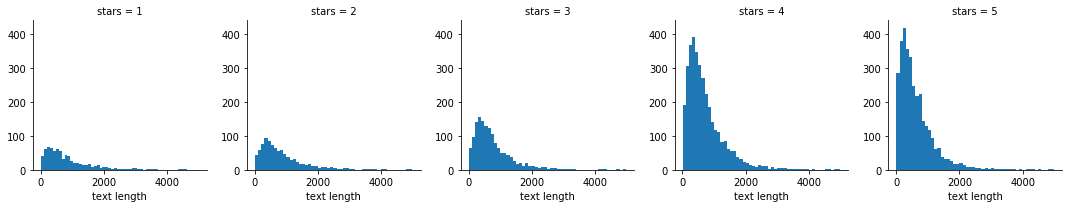

In [53]:
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)
sns.plt.show()

In [ ]:
sns.boxplot(x='stars', y='text length', data=yelp)

In [ ]:
stars = yelp.groupby('stars').mean()
stars.corr()

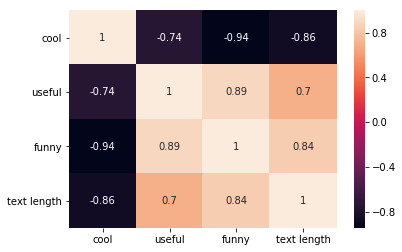

In [54]:
sns.heatmap(data=stars.corr(), annot=True)

In [55]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class.shape

(4086, 11)

In [56]:
X = yelp_class['text']
y = yelp_class['stars']

In [57]:
X[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [58]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [59]:
from textblob import classifiers
classifier = classifiers.NaiveBayesClassifier(training)

In [60]:
## decision tree classifier
dt_classifier = classifiers.DecisionTreeClassifier(training)

In [61]:
print (classifier.accuracy(testing))
classifier.show_informative_features(3)

1.0
Most Informative Features
            contains(is) = True              neg : pos    =      2.9 : 1.0
         contains(never) = False             neg : pos    =      1.8 : 1.0
             contains(a) = False             neg : pos    =      1.8 : 1.0


In [62]:
blob = TextBlob('the weather is terrible!', classifier=classifier)
print (blob.classify())

neg


In [65]:
"""
    sudo pip3 install google-cloud
    Don't share YelpProject-7a1eec4527d3.json...It is the API_Key
"""

from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
import os
#import pymysql
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from datetime import datetime
import pickle


def process_review(review):
    tokens = tokenizer.tokenize(str(review).lower())
    stopped_tokens = [i for i in tokens if not i in stopWords]
    stopped_tokens = [word for word in stopped_tokens if word.isalpha()]
    tokens = [i for i in stopped_tokens]
    return tokens


def analyze_entities(review):
    document = language.types.Document(content=review, type='PLAIN_TEXT')
    response = client.analyze_entities(document=document, encoding_type='UTF32')
    return [object.name for object in response.entities]


def sentiment_analysis(review):
    document = language.types.Document(content=review, type='PLAIN_TEXT')
    response = client.analyze_sentiment(document=document, encoding_type='UTF32')
    sentiment = response.document_sentiment
    return sentiment


def print_time():
    print("Current Time: " + str(datetime.now()))
    print("Time elapsed until now: " + str(datetime.now() - start_time))
    print("\n")


start_time = datetime.now()
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'YelpProject-7a1eec4527d3.json'

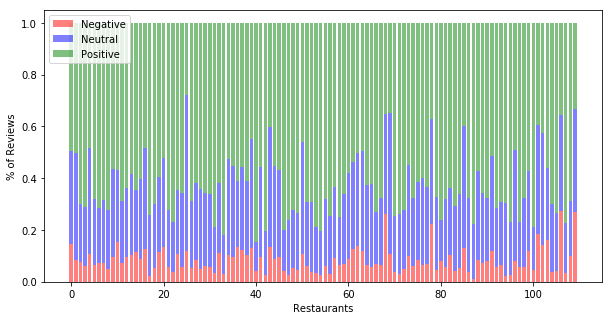

In [64]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def getPolarity(x):
    if x < -0.25:
        return -1
    elif x > 0.25:
        return 1
    else:
        return 0


df = pickle.load(open("review_dump.p", "rb"))
df['score'] = df.sentiment.apply(lambda object: object.score)
df['magnitude'] = df.sentiment.apply(lambda object: object.magnitude)

df['polarity'] = df.score.apply(lambda x: getPolarity(x))

df_new = df[['id','polarity']]
df_count = df_new.groupby(['id','polarity']).size().reset_index(name='count')

all = list(df_count['count'])

A = np.array([])
B = np.array([])
C = np.array([])

for i in range(0,len(all),3):
    a,b,c = all[i:i+3]
    A = np.append(A,a*1.0/(a+b+c))
    B = np.append(B,b*1.0/(a+b+c))
    C = np.append(C,c*1.0/(a+b+c))

X = np.arange(len(df_count)/3)

# print(A)
# print(B)
# print(C)

# plt.bar(X, A, width=0.8,color='r')
# plt.bar(X, B, width=0.8,color='b', bottom=A)
# plt.bar(X, C, width=0.8,color='g', bottom=A+B)
# plt.show()
# print()

f, ax1 = plt.subplots(1, figsize=(10,5))
bar_width = 0.75
ax1.bar(X,A,bar_width,label='Negative',alpha=0.5,color='r')
ax1.bar(X,B,bar_width,label='Neutral',alpha=0.5,color='b',bottom=A)
ax1.bar(X,C,bar_width,label='Positive',alpha=0.5,color='g',bottom=A+B)

ax1.set_xlabel('Restaurants')
ax1.set_ylabel('% of Reviews')


plt.legend(loc='upper left')
plt.savefig("review_analysis.png",bbox_inches='tight')
plt.show()